# 코로나 바이러스로 인한 제과점 매출 EDA

배달의 민족을 통해 얻은 자료로 개인적으로 마음대로 EDA 작업^^ 


가장 큰 목표 : 분석력을 키우자~!!!!!!!!!!!!!

분석목표: 
1. 품목별 매출과 매출 트렌드를 분석해보겠습니다. 판매량이 적은 달을 알아보고 혹은 품목이나 서비스에 문제가 있는 확인해보겠습니다. 판매량이 적은 품목이 있는 경우 다른 품목으로 전환해보겠습니다. 
그리고 코로나 바이러스 이후 많은 고객들이 매장에 직접오지 않고 배달을 이용할 것으로 예상됩니다. 코로나 바이러스 전후의 트렌드도 확인해보겠습니다. 

2. 시간(오후 혹은 저녁), 요일, 고객의 위치별로 주문량을 확인해보겠습니다. 

3. 연관분석 (Association Rule, Apriori)를 통해 활용해보겠습니다. 어떤 아이템이 인기가 많고 좋은 평을 가지고 있는 지 알아보겠습니다.

## 1. Loading and Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('C:/Users/kwnjh/Desktop/project2/Sales_Bakery.csv')
df = df[0:2405]
df.head()

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.replace(np.nan, 0, inplace = True)
df.tail()

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
2400,2020-04-30 12:17,Thur,18800.0,석사동,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2401,2020-04-30 13:10,Thur,14800.0,후평 3동,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2402,2020-04-30 13:43,Thur,16800.0,동면,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2403,2020-04-30 15:01,Thur,18800.0,동면,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2404,2020-04-30 16:02,Thur,15300.0,후평 3동,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info

<bound method DataFrame.info of               datetime day of week    total  place  angbutter  plain bread  \
0     2019-07-11 15:35        Thur  23800.0      0        1.0          0.0   
1     2019-07-11 16:10        Thur  15800.0      0        1.0          0.0   
2     2019-07-12 11:49         Fri  58000.0      0        0.0          0.0   
3     2019-07-13 13:19         Sat  14800.0      0        1.0          1.0   
4     2019-07-13 13:22         Sat  15600.0      0        2.0          0.0   
...                ...         ...      ...    ...        ...          ...   
2400  2020-04-30 12:17        Thur  18800.0    석사동        1.0          1.0   
2401  2020-04-30 13:10        Thur  14800.0  후평 3동        1.0          0.0   
2402  2020-04-30 13:43        Thur  16800.0     동면        2.0          1.0   
2403  2020-04-30 15:01        Thur  18800.0     동면        1.0          1.0   
2404  2020-04-30 16:02        Thur  15300.0  후평 3동        1.0          0.0   

      jam  americano  croissant

In [5]:
df.describe()

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
count,2.405000e+03,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,...,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000
mean,2.117634e+04,1.334719,0.425364,0.103534,0.211227,0.433680,0.088150,0.389189,0.150520,0.299792,...,0.087318,0.163825,0.037422,0.015800,0.233680,0.197505,0.099792,0.022453,0.002911,0.019958
std,2.707763e+04,1.190567,0.650052,0.351619,0.515442,0.865947,0.318137,0.725607,0.409695,0.608061,...,0.302281,0.443783,0.194166,0.137423,0.469835,0.530746,0.359127,0.150964,0.053883,0.145712
min,1.280000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.580000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.850000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.300000e+04,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.293000e+06,11.000000,5.000000,5.000000,5.000000,16.000000,3.000000,14.000000,4.000000,6.000000,...,2.000000,5.000000,2.000000,3.000000,4.000000,6.000000,4.000000,2.000000,1.000000,2.000000


In [6]:
df['date'] = pd.to_datetime(df['datetime'])
df.drop('datetime', axis = 1, inplace = True)

df['dates'] = df['date'].dt.strftime("%Y-%m")
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

df.sample()

,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,...,wiener,vanila latte,berry ade,tiramisu,merinque cookies,date,dates,month,day,hour
489,Sat,15100.0,효자 3동,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2019-09-07 12:39:00,2019-09,9,7,12


In [7]:
df_month_sale = df.groupby(df['dates'], as_index = False)['total'].sum()
df_month_sale.head()

,dates,total
0,2019-07,4076500.0
1,2019-08,6100500.0
2,2019-09,4895500.0
3,2019-10,3959100.0
4,2019-11,4543000.0


## 2. EDA

### 총 매출

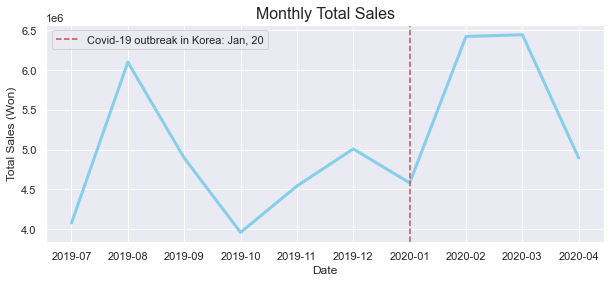

In [8]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (10,4))

sns.lineplot(data = df_month_sale, x = 'dates', y = 'total', color = 'skyblue', linewidth = 3)
plt.axvline(x = '2020-01', color = 'r', linestyle = '--', label = 'Covid-19 outbreak in Korea: Jan, 20')

plt.legend()
plt.title('Monthly Total Sales', size = 16)
plt.xlabel('Date')
plt.ylabel('Total Sales (Won)')
plt.show()

7월 11일 배달서비스를 시작한 이후 20일 간의 판매를 확인하였으며, 8월에는 600만원 매출을 기록하였지만, 9월과 10월에는 매출이 극감하였습니다. 국내 최초 코로나 바이러스 확진자 발생 이후 배달 매출이 급증하였습니다. 

### 코로나 바이러스의 확산세  

In [9]:
# 자료제공 : https://www.kaggle.com/kimjihoo/ds4c-what-is-this-dataset-detailed-description (김지후 님)
corona = pd.read_csv('C:/Users/kwnjh/Desktop/project2/corona_southkorea.csv')
corona['date'] = pd.to_datetime(corona['date'])
corona['date'] = corona['date'].dt.strftime("%Y-%m-%d")
corona.set_index('date', inplace=True)

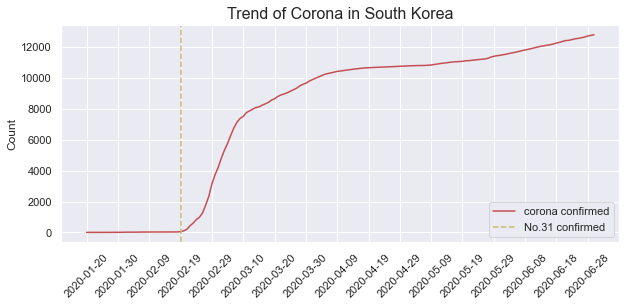

In [10]:
sns.set(style = 'darkgrid')

fig, ax = plt.subplots(figsize = (10,4))
x = corona.index
y = corona.confirmed

ax.plot(x,y, label = 'corona confirmed', color = 'r')
plt.axvline(x = '2020-02-19', color = 'y', linestyle = '--', label = 'No.31 confirmed')
ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation = 45)
plt.title("Trend of Corona in South Korea", size = 16)
plt.ylabel('Count')
plt.legend()
plt.show()

위의 그래프는 한국의 코로나 바이러스 누적 확진자에 관련된 그래프이며, 2월18일 확진자 이후로 큰 폭으로 확진자가 발생되었습니다. 이 기간동안 고객들은 매장보다 배달서비스를 이용하였고, 이러한 이유로 매출이 급증한 것으로 보입니다. 4월과 5월에 확진자 변동폭이 줄어들며, 매출이 감소한 것을 알 수 있었습니다. 즉 매장의 가동률이 증가하였다고 분석할 수 있습니다.

### 각 품목의 월별 매출

In [11]:
df_month_pain = df.groupby(df['dates'], as_index = False)[['angbutter', 'plain bread', 'jam',
                                                           'croissant', 'tiramisu croissant',
                                                           'cacao deep', 'pain au chocolat', 'almond croissant', 'croque monsieur',
                                                           'mad garlic', 'gateau chocolat', 'pandoro',
                                                           'cheese cake', 'orange pound', 'wiener','tiramisu', 'merinque cookies']].sum()
df_month_pain

,dates,angbutter,plain bread,jam,croissant,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,gateau chocolat,pandoro,cheese cake,orange pound,wiener,tiramisu,merinque cookies
0,2019-07,187.0,40.0,9.0,80.0,65.0,7.0,47.0,20.0,0.0,0.0,19.0,27.0,0.0,34.0,24.0,5.0,0.0
1,2019-08,430.0,105.0,32.0,151.0,77.0,18.0,101.0,38.0,0.0,0.0,32.0,64.0,0.0,57.0,98.0,2.0,9.0
2,2019-09,337.0,79.0,21.0,113.0,76.0,52.0,79.0,25.0,0.0,0.0,36.0,35.0,0.0,51.0,56.0,0.0,8.0
3,2019-10,249.0,71.0,26.0,92.0,68.0,30.0,80.0,26.0,0.0,0.0,12.0,30.0,2.0,43.0,42.0,0.0,2.0
4,2019-11,288.0,116.0,36.0,92.0,78.0,32.0,62.0,15.0,0.0,0.0,10.0,35.0,16.0,50.0,39.0,0.0,3.0
5,2019-12,314.0,101.0,27.0,89.0,117.0,39.0,67.0,22.0,0.0,0.0,14.0,25.0,16.0,61.0,45.0,0.0,3.0
6,2020-01,300.0,97.0,23.0,79.0,99.0,39.0,46.0,16.0,0.0,0.0,16.0,45.0,17.0,52.0,42.0,0.0,4.0
7,2020-02,391.0,137.0,29.0,128.0,111.0,46.0,79.0,33.0,0.0,0.0,26.0,55.0,18.0,86.0,48.0,0.0,7.0
8,2020-03,403.0,172.0,31.0,120.0,132.0,51.0,91.0,21.0,0.0,0.0,23.0,40.0,13.0,74.0,35.0,0.0,4.0
9,2020-04,311.0,105.0,15.0,99.0,113.0,48.0,69.0,17.0,0.0,0.0,22.0,38.0,8.0,54.0,46.0,0.0,8.0


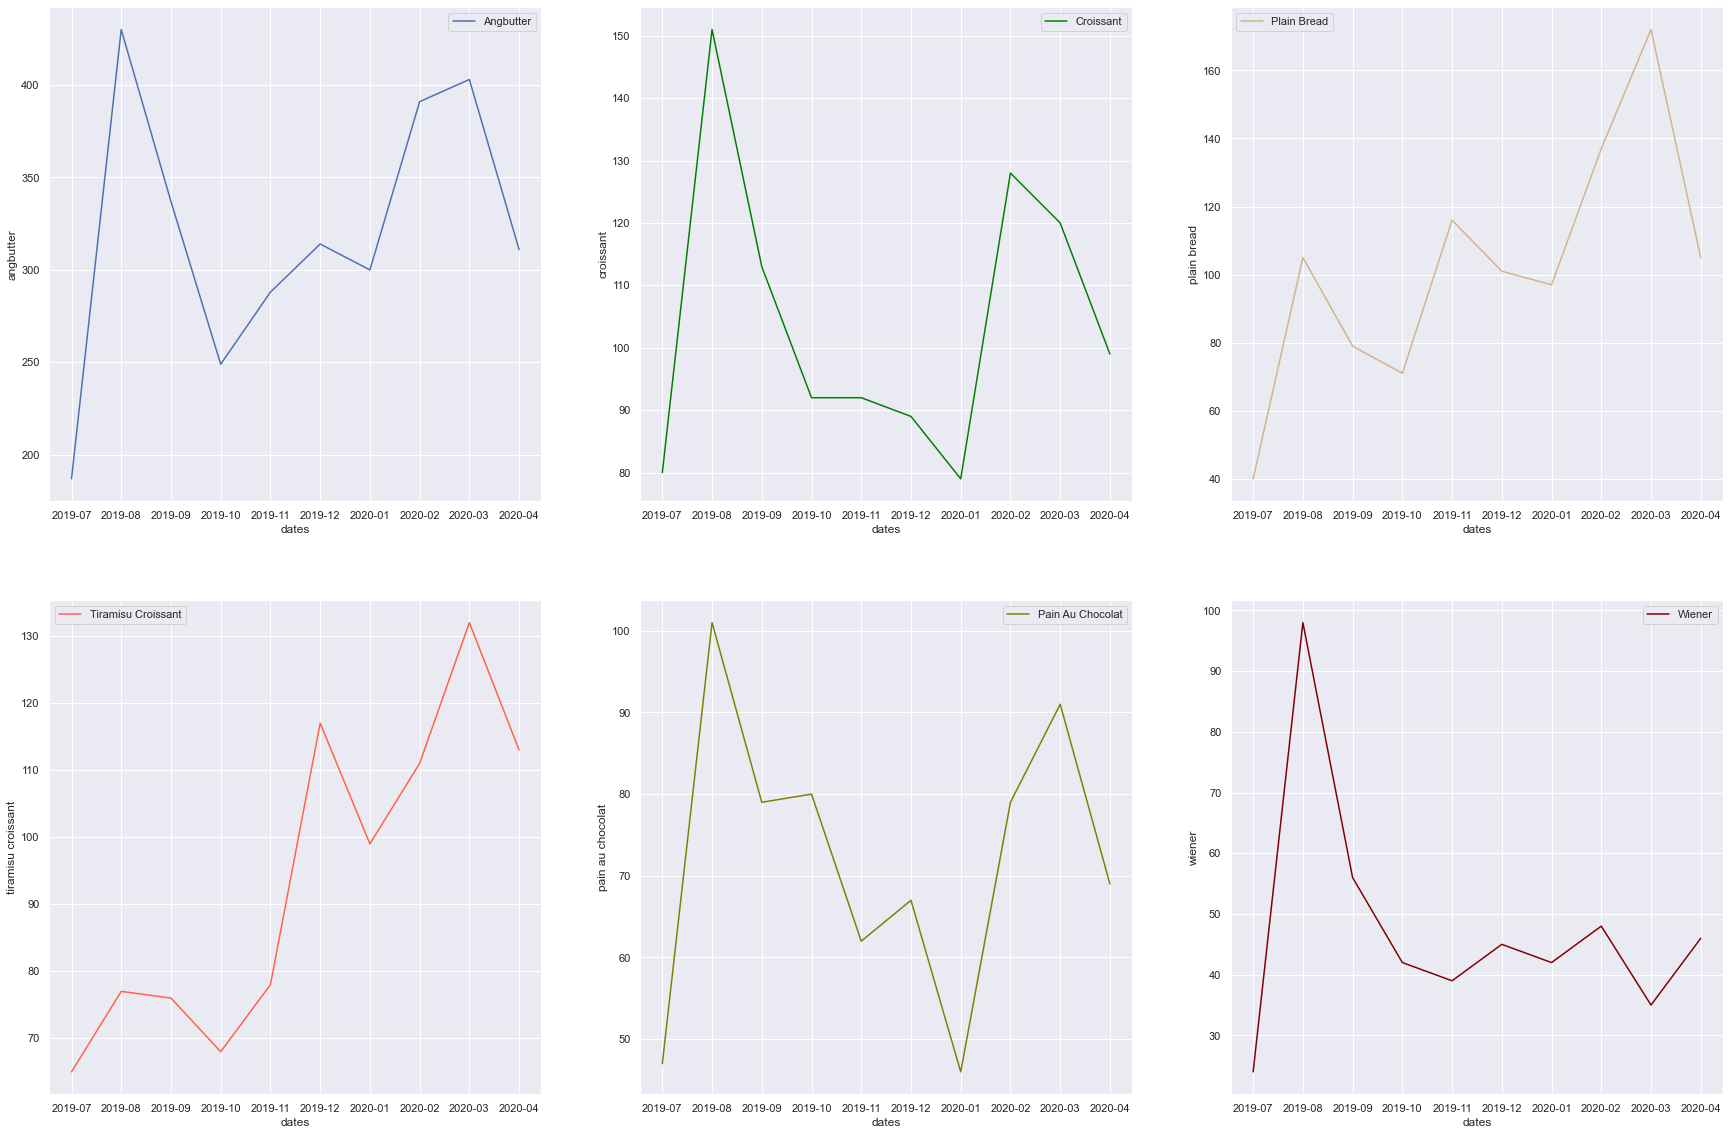

In [12]:
sns.set(style = 'darkgrid')
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols = 3, nrows = 2)

figure.set_size_inches(30, 20)
sns.lineplot(data = df_month_pain, x = 'dates', y = 'angbutter', label = 'Angbutter', ax = ax1)
sns.lineplot(data = df_month_pain, x = 'dates', y = 'croissant', label = 'Croissant', ax = ax2, color = 'green')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'plain bread', label = 'Plain Bread', ax = ax3, color = 'Tan')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'tiramisu croissant', label = 'Tiramisu Croissant', ax = ax4, color = 'Tomato')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'pain au chocolat', label = 'Pain Au Chocolat', ax = ax5, color = 'Olive')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'wiener', label = 'Wiener', ax = ax6, color = 'Maroon')

plt.show()

제과점에서 가장 많이 팔리는 품목은 Angbutter이며 총 매출과 밀접한 관련이 있습니다. Croissant와 Pain au chocolat품목은 2월에 판매되고 판매량이 월등히 적습니다. 그리고 Tiramisu와 Croissant, Plain bread의 증가 추세가 엿보입니다.  

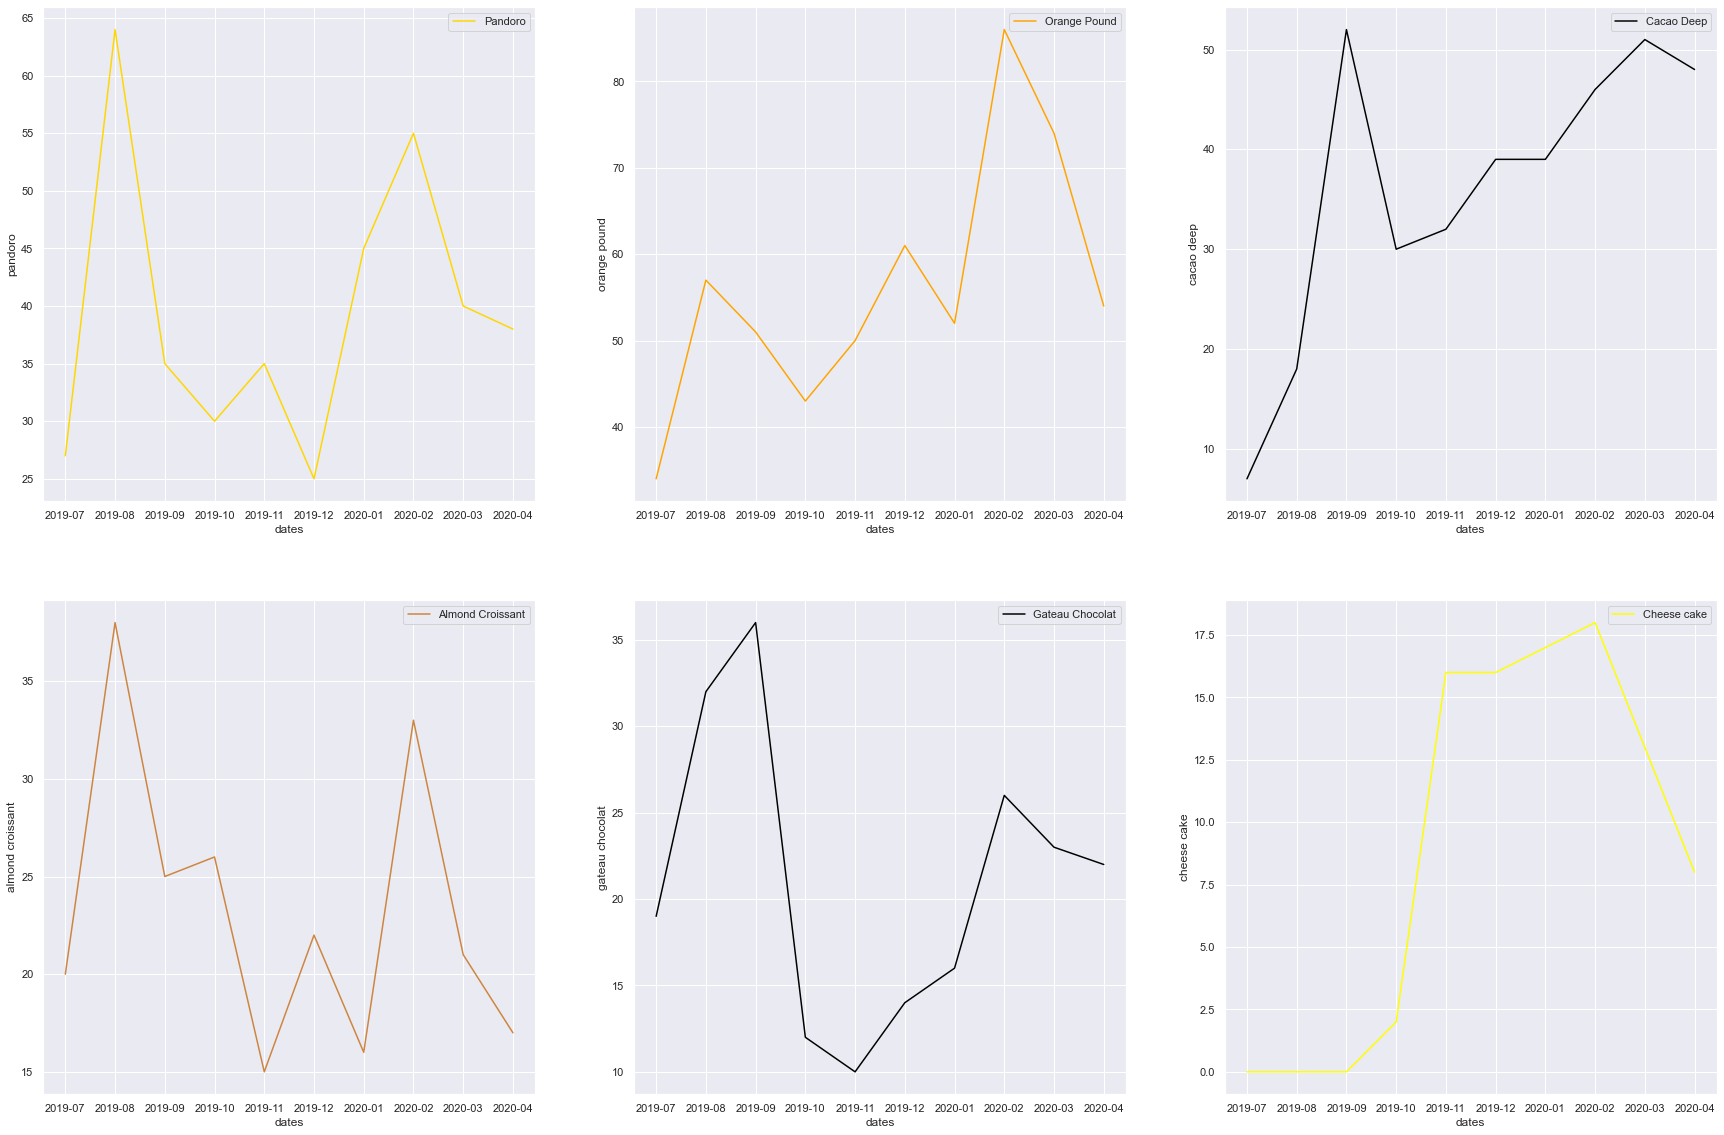

In [13]:
sns.set(style = 'darkgrid')
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols = 3, nrows = 2)

figure.set_size_inches(30,20)
sns.lineplot(data = df_month_pain, x = 'dates', y = 'pandoro', label = 'Pandoro', ax = ax1, color = 'gold')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'orange pound', label = 'Orange Pound', ax = ax2, color = 'orange')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'cacao deep', label = 'Cacao Deep', ax = ax3, color = 'black')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'almond croissant', label = 'Almond Croissant', ax = ax4, color = 'Peru')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'gateau chocolat', label = 'Gateau Chocolat', ax = ax5, color = 'black')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'cheese cake', label = 'Cheese cake', ax = ax6, color = 'yellow')

plt.show()

Pandoro는 12월 판매량이 가장 낮았습니다. 하지만 1월부터는 매출회복 조짐이 보였습니다. 그리고 Orange Pound와 Cacao deep도 매출이 증가하고 있습니다. 그리고 특이사항은 Cacao deep의 매출은 꾸준한 매출이 증가하고 있었습니다. Amond Croissant의 매출은 매우 저조해보였습니다. 품목 판매량을 고려할 시 생산량을 줄이거나 다른 품목으로 교체해야할 가능성이 커 보입니다.

### 각 음료의 월별 매출 

In [14]:
df_month_beverage = df.groupby(df['dates'], as_index = False)[['americano', 'caffe latte', 'milk tea', 'vanila latte', 'berry ade', 'lemon ade']].sum()
df_month_beverage

,dates,americano,caffe latte,milk tea,vanila latte,berry ade,lemon ade
0,2019-07,26.0,7.0,10.0,18.0,6.0,5.0
1,2019-08,46.0,27.0,16.0,23.0,9.0,5.0
2,2019-09,44.0,16.0,17.0,20.0,5.0,1.0
3,2019-10,43.0,17.0,6.0,27.0,2.0,4.0
4,2019-11,40.0,29.0,19.0,26.0,2.0,6.0
5,2019-12,65.0,26.0,22.0,16.0,4.0,1.0
6,2020-01,44.0,15.0,18.0,17.0,7.0,3.0
7,2020-02,86.0,19.0,27.0,42.0,8.0,4.0
8,2020-03,67.0,38.0,18.0,34.0,8.0,4.0
9,2020-04,47.0,18.0,7.0,17.0,3.0,5.0


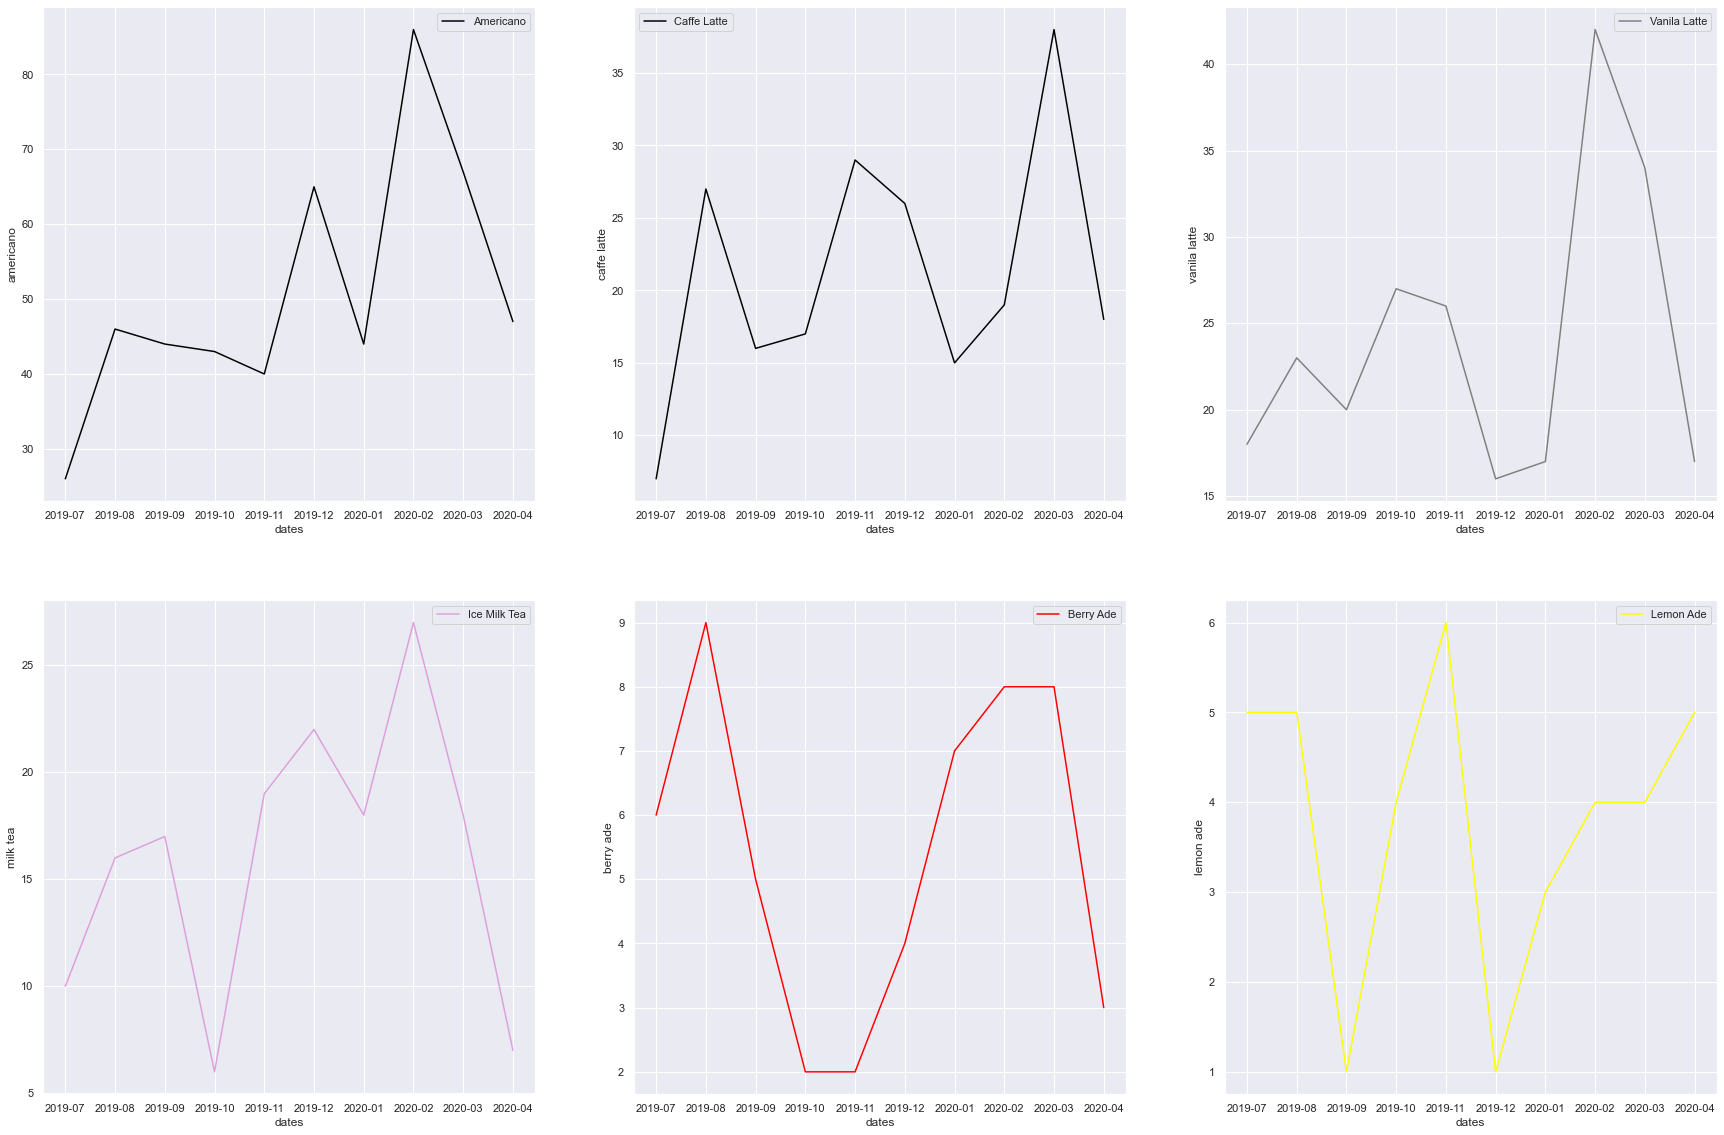

In [15]:
sns.set(style = 'darkgrid')
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols = 3, nrows = 2)

figure.set_size_inches(30,20)
sns.lineplot(data = df_month_beverage, x = 'dates', y = 'americano', label = 'Americano', ax = ax1, color = 'black')
sns.lineplot(data = df_month_beverage, x = 'dates', y = 'caffe latte', label = 'Caffe Latte', ax = ax2, color = 'black')
sns.lineplot(data = df_month_beverage, x = 'dates', y = 'vanila latte', label = 'Vanila Latte', ax = ax3, color = 'gray')
sns.lineplot(data = df_month_beverage, x = 'dates', y = 'milk tea', label = 'Ice Milk Tea', ax = ax4, color = 'Plum')
sns.lineplot(data = df_month_beverage, x = 'dates', y = 'berry ade', label = 'Berry Ade', ax = ax5, color = 'red')
sns.lineplot(data = df_month_beverage, x = 'dates', y = 'lemon ade', label = 'Lemon Ade', ax = ax6, color = 'yellow')

plt.legend()
plt.show()

빵 판매에 비해 음료 판매가 월등히 적습니다. 그리고 대부분의 음료는 4월에 매우 낮은 판매량을 기록하였습니다. 코로나 바이러스 확산이 줄어듦과 동시에 배달서비스보다 제과점에서 음료를 마셨기 때문이라 생각이 듭니다.

### 요일별 분석

#### 날짜 및 요일, 장소 별 매출

In [16]:
df['time'] = ['lunch' if hour < 14 else 'afternoon' for hour in df['hour']]

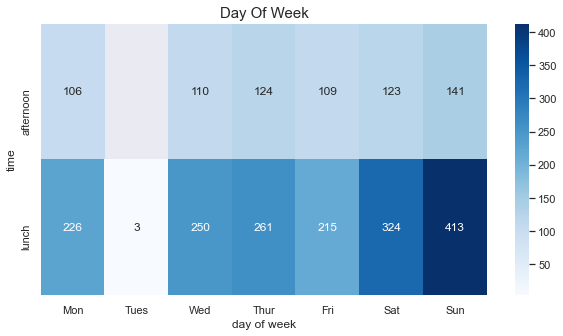

In [17]:
p = df.pivot_table(index = 'time', columns = 'day of week', values = 'day', aggfunc = 'count')
p = p.reindex(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], axis = 1)

plt.figure(figsize = (10,5))
g = sns.heatmap(p, annot = True, cmap = 'Blues', fmt = ".0f")
plt.title("Day Of Week", size = 15)
plt.show()

#### Angbutter 매출 (제과점 시그니처 메뉴)

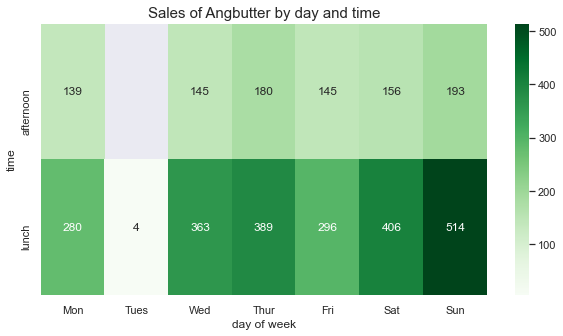

In [18]:
angbutter_pivot = df.pivot_table(index = 'time', columns = 'day of week', values = 'angbutter', aggfunc = 'sum')
angbutter_pivot = angbutter_pivot.reindex(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], axis = 1)

plt.figure(figsize = (10,5))
g = sns.heatmap(angbutter_pivot, annot = True, cmap = 'Greens', fmt= ".0f")
plt.title('Sales of Angbutter by day and time', size = 15)
plt.show()

일반적으로 주문량은 점심시간이 많았으며, 토요일과 일요일의 주문량이 많았습니다. 예상외로 금요일 판매량이 낮다는 사실이 놀랍습니다. 

#### 고객위치별 매출 

In [19]:
df_place = df[df['place'] != 0]

In [20]:
df_place['place'].replace({'소양동' : 'Soyang-dong', '효자 3동' : 'Hyoja3-dong', '후평 1동' : 'Hoopyeong1-dong', '후평 2동' : 'Hoopyeong2-dong', 
                           '석사동' : 'Seoksa-dong', '퇴계동' : 'Toegye-dong', '동면' : 'Dongmyeon', '후평 3동': 'Hoopyeong3-dong', "신사우동" : 'Sinsawoo-dong',
                          "강남동" : 'Gangnam-dong', "효자 1동": 'Hyoja1-dong', '조운동' : 'Jowoon-dong', '교동' : 'Gyo-dong', '효자 2동' : 'Hyoja2-dong', '약사명동' : 'Yaksamyeong-dong',
                          '근화동': 'Geunhwa-dong', '동내면' : 'Dongnae-myeon', '신동면' : 'Sindong-myeon', '교동 ': 'Gyo-dong'}, inplace = True)

C:\Users\kwnjh\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


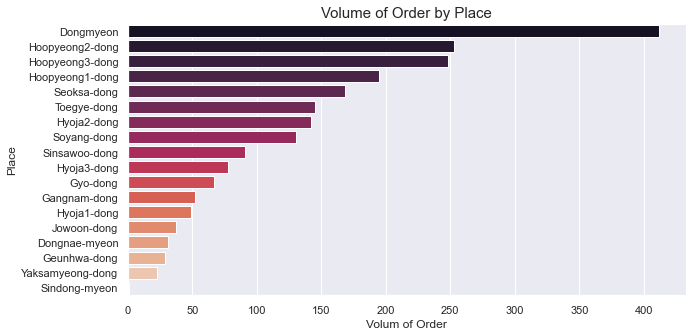

In [21]:
g = df_place.groupby('place').count()
g.reset_index(inplace = True)
g.sort_values(by = 'time', inplace = True, ascending = False)

plt.figure(figsize = (10, 5))

sns.barplot(data = g, x = 'time', y = 'place', palette = 'rocket')
plt.title('Volume of Order by Place', size = 15)
plt.xlabel('Volum of Order')
plt.ylabel('Place')
plt.show()

제과점은 동면에 위치해있기에 동면에서 가장 높은 판매량을 보였습니다. 그리고 인근 후평동에서도 많은 매출을 보여줬습니다. 배달의 민족 서비스에 따라 배송비가 다르기 때문에 상대적으로 먼 동네에서 낮은 판매율을 보여줬습니다. 

## 3. Association Analysis (연관분석)

In [24]:
from mlxtend.frequent_patterns import apriori, association_rules

In [25]:
df_item = df.reset_index(inplace = True)
df_item = df.drop(['date','place', 'day of week', 'total', 'dates', 'month', 'day', 'hour','time'], axis = 1, index = None)
df_item = df_item.isin([1])
df_item.head()

,index,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,True,True,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
df_apriori = apriori(df_item, min_support = 0.01, use_colnames = True)
df_apriori.sort_values(by = 'support', ascending = False).head()

,support,itemsets
0,0.500208,(angbutter)
1,0.297297,(plain bread)
6,0.275676,(tiramisu croissant)
4,0.223285,(croissant)
8,0.197505,(pain au chocolat)


고객의 절반은 Angbutter을 주문하며, 약 30%는 Plain bread을 주문하는 것을 알 수 있습니다. 

In [27]:
df_apriori['length'] = df_apriori['itemsets'].apply(lambda x : len(x))

In [28]:
df_apriori2 = df_apriori[(df_apriori['length'] == 2) & df_apriori['support'] >= 0.05]
df_apriori2.sort_values(by = 'support', ascending = False).head()

,support,itemsets,length
25,0.164241,"(angbutter, tiramisu croissant)",2
20,0.161331,"(angbutter, plain bread)",2
23,0.122245,"(angbutter, croissant)",2
27,0.114345,"(angbutter, pain au chocolat)",2
33,0.105613,"(angbutter, orange pound)",2


In [29]:
rules = association_rules(df_apriori, metric = 'lift', min_threshold = 1)
rules.sort_values(by = 'support', ascending = False, inplace = True)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(angbutter),(tiramisu croissant),0.500208,0.275676,0.164241,0.328346,1.191058,0.026346,1.078419
11,(tiramisu croissant),(angbutter),0.275676,0.500208,0.164241,0.595777,1.191058,0.026346,1.236426
0,(angbutter),(plain bread),0.500208,0.297297,0.161331,0.322527,1.084864,0.012620,1.037241
1,(plain bread),(angbutter),0.297297,0.500208,0.161331,0.542657,1.084864,0.012620,1.092818
6,(angbutter),(croissant),0.500208,0.223285,0.122245,0.244389,1.094517,0.010556,1.027930


고객들의 대부분이 구매한 품목은 Angbutter, Tiramisu Croissant, Plain Bread인 것으로 도출됩니다.

## 결론

연관분석에 대하여 공부하였고 적용하기 위해서 EDA를 진행해봤습니다. 
데이터를 직접 수집하는 과정은 어려웠지만 데이터 시각화에 대한 실력은 많이 향상되었다고 생각합니다.